# Nonnegative Matrix Factorization

Nonnegative matrix factorization (NMF) is an algorithm that factorizes a matrix, $X$, into a product of two matrices, $W$ and $H$. It is an unsupervised iterative algorithm that minimizes a distance between $X$ and the product $WH$:

$$ \min_{W, H} d(X, WH) $$

If $X$ has dimensions $M$ by $N$, then $W$ will have dimensions $M$ by $R$, and $H$ will have dimensions $R$ by $N$, where inner dimension $R$ is the *rank* or *number of components* of the decomposition.

When applied to a musical signal, we find that NMF can decompose the signal into separate note events. Therefore, NMF is quite useful and popular for tasks such as transcription and source separation.

The input, $X$, is often a magnitude spectrogram. In such a case, we find that the columns of $W$ represent spectra of note events, and the rows of $H$ represent temporal envelopes of the same note events.

In [2]:
from sklearn.decomposition import NMF
from IPython.display import Audio
import soundfile as sf
import librosa
import numpy as np
import librosa.display as ld
import matplotlib.pyplot as plt

Let's load a signal:

In [9]:
x, fs = sf.read('Test_1.wav')
print(x.shape)

# Mezclando ambos canales
audio_mono = 0.5 * (x[:,0] + x[:,1])

Audio(audio_mono, rate=fs)

(1165528, 2)


In [27]:
# Lectura del audio
audio, samplerate = sf.read('Drums.wav')

print(audio.shape)

# Normalizar audio
audio_mono = audio/max(abs(audio))

# Escuchar
Audio(audio_mono, rate=samplerate)

(132300,)


Compute the spectrogram:

In [34]:
S = librosa.stft(audio_mono)
print(S.shape)
X = np.abs(S)

(1025, 259)


In [35]:
1025*2277

2333925

Display the spectrogram:

<IPython.core.display.Javascript object>


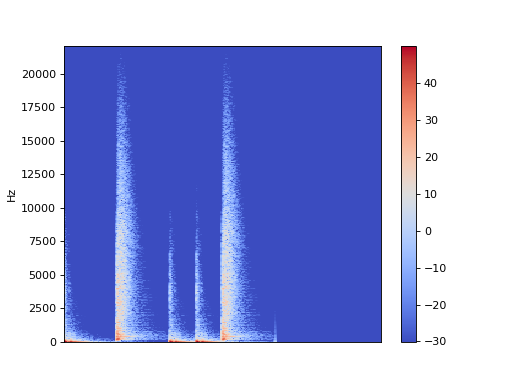

In [36]:
%matplotlib notebook
logX = librosa.amplitude_to_db(X)
ld.specshow(logX, sr=fs, y_axis='linear')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


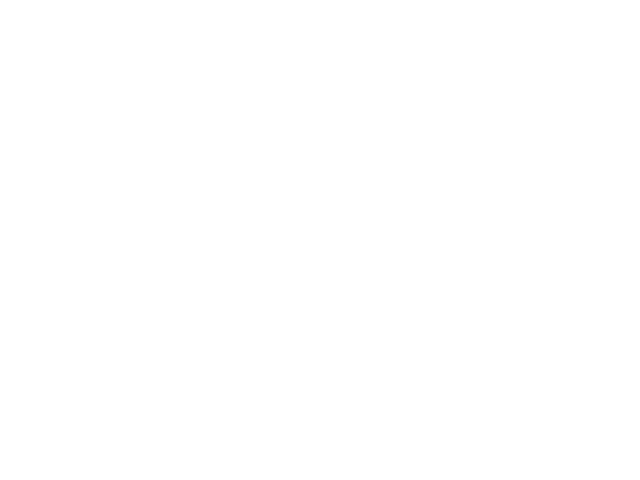

In [6]:
%matplotlib notebook
plt.pcolormesh(range(X.shape[1]), range(X.shape[0]), 20*np.log10(X), cmap='inferno')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<IPython.core.display.Javascript object>


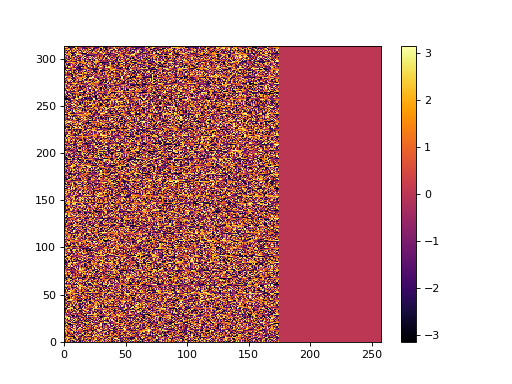

In [37]:
%matplotlib notebook
angle_S = np.angle(S)
t = range(X.shape[1])
f = np.linspace(np.min(X), np.max(X), X.shape[0])
plt.pcolormesh(t, f, np.angle(S), cmap='inferno')
plt.colorbar()
plt.show()

In [24]:
print(S)
print(angle_S)

[[-3.7715691e+01+0.0000000e+00j -1.0947308e+01+0.0000000e+00j
  -2.4174334e+01+0.0000000e+00j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]
 [ 1.0639902e+01-5.9154071e-15j  1.1991259e+01+3.2793884e+01j
   2.5146547e+01-4.9893585e+01j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]
 [ 1.9524980e+02-1.8969034e-15j -6.2938015e+01-2.0017067e+02j
  -9.3053741e+01+1.6489015e+02j ...  0.0000000e+00-0.0000000e+00j
   0.0000000e+00-0.0000000e+00j  0.0000000e+00-0.0000000e+00j]
 ...
 [-2.3539164e-03+1.2307696e-15j  1.7789234e-03+5.3076952e-04j
  -7.2999415e-04-9.4506628e-04j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]
 [ 1.8001349e-03+1.1345092e-15j -1.0599645e-03-8.7273261e-04j
   4.8702810e-04+1.1182682e-03j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]
 [-8.4240513e-04+0.0000000e+00j -1.89330

In [38]:
a = np.array([[1,2,3],[10, 5, 6]])
np.max(a)

10

## `sklearn.decomposition.NMF`

We use `sklearn.decomposition.NMF` in a manner similar to `KMeans` and `KNearestNeighbor`. 

First, the `fit` method trains a model. 

In [39]:
model = NMF(n_components=2)#, beta_loss = 'itakura-saito', solver='mu')
model.fit(X)

ValueError: When beta_loss <= 0 and X contains zeros, the solver may diverge. Please add small values to X, or use a positive beta_loss.

To extract the matrix $W$, use `transform`:

In [17]:
W = model.transform(X)
print(W.shape)

NotFittedError: This NMF instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Let's display the two spectra:

In [18]:
%matplotlib notebook
logW = np.log1p(W)
f = np.arange(W.shape[0])
plt.plot(f, logW[:,0], f, logW[:,1])
plt.xlabel('Frequency')
plt.ylabel('log(1 + Amplitude)')
plt.show()

NameError: name 'W' is not defined

Let's display the temporal activations:

In [19]:
%matplotlib notebook
H = model.components_
print(H.shape)
t = np.arange(H.shape[1])
plt.plot(t, H[0], t, H[1])
plt.legend(('Kick Drum', 'Snare Drum'))
plt.show()

AttributeError: 'NMF' object has no attribute 'components_'

In [20]:
Y0 = np.outer(W[:,0], H[0])*np.exp(1j*np.angle(S))
Y1 = np.outer(W[:,1], H[1])*np.exp(1j*np.angle(S))
y0 = librosa.istft(Y0)
y1 = librosa.istft(Y1)
y0.shape, y1.shape

NameError: name 'W' is not defined

In [21]:
t = np.arange(len(y0))
plt.plot(t, y0, t, y1)
plt.show()

NameError: name 'y0' is not defined

In [22]:
Audio(y0, rate=fs)

NameError: name 'y0' is not defined

In [23]:
Audio(y1, rate=fs)

NameError: name 'y1' is not defined

In [18]:
Audio((y0 + y1)/2, rate=fs)